# Case 3. Heart Disease Classification 
    Cognitive Systems for Health Technology Applications
    19.3.2019, Emil Rantanen ja Wille Tuovinen
    Metropolia University of Applied Sciences

## 1. Objectives

This is the code made for the Case 3 exercise of the Cognitive Systems for Health Technology applications.

The goal of this assignment were to use recurrent and neural networks to process text data and predict ratings from a review text.

Links to codes used to complete this assignment: 

Case 3. Data analysis and first classification experiments
https://github.com/sakluk/cognitive-systems-for-health-technology/blob/master/Week%206.%20Case%203%20-%20First%20classification%20experiments.ipynb

Embedding, LSTM, GRU and Conv1D
https://github.com/sakluk/cognitive-systems-for-health-technology/blob/master/Week%207.%20embedding-lstm-gru-and-conv1d.ipynb

There were also pieces of code based on the previous cases.

In [1]:
# Import librarys what are needed in this case3
from __future__ import print_function
import numpy as np # linear algebra
import pandas as pd # data processing

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Embedding, LSTM, Bidirectional, Dropout

from keras.preprocessing import sequence
from keras.models import Sequential

#For CNN
from keras.layers import Conv1D, Activation, MaxPooling1D, Dropout, Flatten, Dense
from keras import optimizers

import os
print(os.listdir("../../case3_datas"))


Using TensorFlow backend.


['drugsComTest_raw.csv', 'drugsComTrain_raw.csv']


In [2]:
# Create dataframes train and test
test = pd.read_csv(r"../../case3_datas/drugsComTest_raw.csv")
train = pd.read_csv(r"../../case3_datas/drugsComTrain_raw.csv")
train.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [3]:
test.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4,3-Jul-14,13
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,6-Jun-16,1
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,21-Apr-09,32
8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7,18-Oct-16,21
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,16-Apr-11,3


In [4]:
print("Training data shape:", train.shape)
print("Test data shape:", test.shape)

Training data shape: (161297, 7)
Test data shape: (53766, 7)


In [20]:
# Create labels based on the original article: Grässer et al. (2018)
# Laels 
r = train['rating']
labels =   1*(( 1 <= r ) & ( r <= 2 )) + 2*(( 3 <= r ) & ( r <= 4 )) \
        +  3*(( 5 <= r ) & ( r <= 6 )) + 4*(( 7 <= r ) & ( r <= 8 )) \
        +  5*(( 9 <= r ) & ( r <= 10)) 
# Add the label column to the data
train['label'] = labels
# Check the new data
train.head(20)

,uniqueID,drugName,condition,review,rating,date,usefulCount,label
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,5
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,4
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,3
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,4
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,5
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,1
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,1
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32,5
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11,1
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1,4


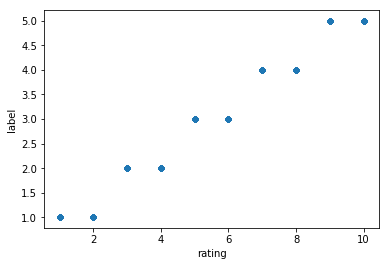

In [29]:
# Check ratings to labels conversion
import matplotlib.pyplot as plt
train.plot(x = 'rating', y = 'label', kind = 'scatter')
plt.show()


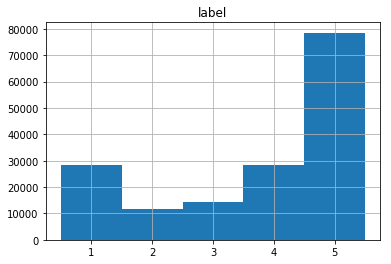

In [28]:

# Plot distribution of labels
train.hist(column = 'label', bins = np.arange(1, 7), align = 'left');

# Convert reviews to padded sequences

In [51]:

# Read a part of the reviews and create training sequences (x_train)
samples = train['review'].iloc[:10000]
tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
x_train = pad_sequences(sequences, maxlen = 500)


# Read a part of the reviews and create testing sequences (x_test)
test_samples = test['review'].iloc[:10000]
test_tokenizer = Tokenizer(num_words = 1000)
test_tokenizer.fit_on_texts(test_samples)
test_sequences = tokenizer.texts_to_sequences(test_samples)
x_test = pad_sequences(test_sequences, maxlen = 500)

# Convert labels to one-hot-categories

In [33]:

# Convert the labels to one_hot_category values
one_hot_labels = to_categorical(labels[:10000], num_classes = 7)

# Check the shapes

In [34]:
# Check the training and label sets
x_train.shape, one_hot_labels.shape

((10000, 500), (10000, 7))

In [35]:
print(one_hot_labels)
print(" ")
print(x_train)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
 
[[  0   0   0 ...  97 148   2]
 [  0   0   0 ...   3 202 332]
 [  0   0   0 ... 371  10  24]
 ...
 [  0   0   0 ... 152   4   7]
 [  0   0   0 ...  11 107 661]
 [  0   0   0 ...  88 220 462]]


In [36]:
# We use the same plotting commands several times, so create a function for that purpose
def plot_history(history):
    
    f, ax = plt.subplots(1, 2, figsize = (16, 7))
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.sca(ax[0])
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.sca(ax[1])
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [53]:
# Similarly create a function for model training, for demonstration purposes we use constant values
def train_model(model, x, y, e = 10, bs = 32, v = 1, vs = 0.25):
    h = model.fit(x, y, epochs = e, batch_size = bs, verbose = v, validation_split = vs)
    return h

In [40]:

# First model: Embedding layer -> Flatten -> Dense classifier
m0 = Sequential()
m0.add(Embedding(1000, 64, input_length = 500)) # 1000 = num_words, 64 = Embedding layers, 500 = sequence length
m0.add(Flatten())
m0.add(Dense(32, activation = 'relu'))
m0.add(Dense(7, activation = 'softmax'))
m0.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])
m0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 64)           64000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1024032   
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 231       
Total params: 1,088,263
Trainable params: 1,088,263
Non-trainable params: 0
_________________________________________________________________


Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 4s 508us/step - loss: 1.3768 - acc: 0.4868 - val_loss: 1.3247 - val_acc: 0.5280
Epoch 2/10
7500/7500 [==============================] - 3s 463us/step - loss: 1.1581 - acc: 0.5676 - val_loss: 1.2090 - val_acc: 0.5424
Epoch 3/10
7500/7500 [==============================] - 4s 473us/step - loss: 0.9719 - acc: 0.6177 - val_loss: 1.1792 - val_acc: 0.5496
Epoch 4/10
7500/7500 [==============================] - 4s 476us/step - loss: 0.7481 - acc: 0.7319 - val_loss: 1.2593 - val_acc: 0.5068
Epoch 5/10
7500/7500 [==============================] - 4s 470us/step - loss: 0.5131 - acc: 0.8395 - val_loss: 1.3604 - val_acc: 0.5200
Epoch 6/10
7500/7500 [==============================] - 4s 472us/step - loss: 0.3175 - acc: 0.9103 - val_loss: 1.5486 - val_acc: 0.5028
Epoch 7/10
7500/7500 [==============================] - 4s 489us/step - loss: 0.1868 - acc: 0.9511 - val_loss: 1.8057 - val_acc: 0.5036


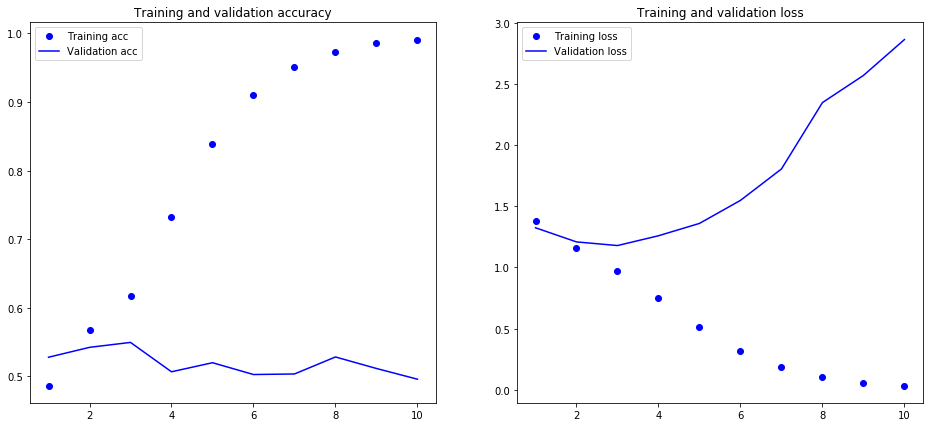

In [41]:
# Train the first model and plot the history
h0 = train_model(m0, x_train, one_hot_labels)
plot_history(h0)

# Model nro.2 using CNN

Similarly create a function for model training, for demonstration purposes we use constant values

In [ ]:
def train_model(model, x, y, e = 10, bs = 32, v = 1, vs = 0.25):
    h = model.fit(x, y, epochs = e, batch_size = bs, verbose = v, validation_split = vs)
    return h
h1 = train_model(h, x_train, one_hot_labels)


Lets Create a basic Sequential model with several Conv1D layers

In [74]:
model = Sequential()

model.add(Embedding(1600, 32, input_length = 500))
model.add(Conv1D(32, (3), activation = 'relu', input_shape = (161297, 7)))
model.add(Conv1D(32, (3), activation = 'relu'))
model.add(MaxPooling1D(pool_size = (2)))
model.add(Dropout(0.25))

model.add(Conv1D(64, (3), activation = 'relu'))
model.add(Conv1D(64, (3), activation = 'relu'))
model.add(MaxPooling1D(pool_size = (2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'softmax'))

# Try a custom metrics, needs to be calculated in backend (Tensorflow)  
from keras import backend
#def rmse(y_true, y_pred):
#    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = sgd,
             loss='categorical_crossentropy', 
              metrics = ["accuracy", "mse", rmse])

infoa = """ All possible options for model.compile
For more details, see: https://keras.io/models/model/
model.compile( 
    optimizer, 
    loss = None, 
    metrics = None, 
    loss_weights = None, 
    sample_weight_mode = None, 
    weighted_metrics = None,
    target_tensors = None)
"""
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 500, 32)           51200     
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 498, 32)           3104      
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 496, 32)           3104      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 248, 32)           0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 248, 32)           0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 246, 64)           6208      
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 244, 64)           12352     
__________

# Here we TRAIN the CNN model

In [75]:
h1 = train_model(model, x_train, one_hot_labels)


Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 11s 1ms/step - loss: 1.4513 - acc: 0.4859 - mean_squared_error: 0.1014 - rmse: 0.3079 - val_loss: 1.3966 - val_acc: 0.4808 - val_mean_squared_error: 0.0996 - val_rmse: 0.3077
Epoch 2/10
7500/7500 [==============================] - 10s 1ms/step - loss: 1.3924 - acc: 0.4887 - mean_squared_error: 0.0991 - rmse: 0.3040 - val_loss: 1.3948 - val_acc: 0.4808 - val_mean_squared_error: 0.0994 - val_rmse: 0.3039
Epoch 3/10
7500/7500 [==============================] - 10s 1ms/step - loss: 1.3845 - acc: 0.4887 - mean_squared_error: 0.0988 - rmse: 0.3034 - val_loss: 1.3897 - val_acc: 0.4808 - val_mean_squared_error: 0.0993 - val_rmse: 0.3063
Epoch 4/10
7500/7500 [==============================] - 10s 1ms/step - loss: 1.3828 - acc: 0.4887 - mean_squared_error: 0.0987 - rmse: 0.3030 - val_loss: 1.3900 - val_acc: 0.4808 - val_mean_squared_error: 0.0994 - val_rmse: 0.3028
Epoch 5/10
7500/7500 [======

# Lets plot the train

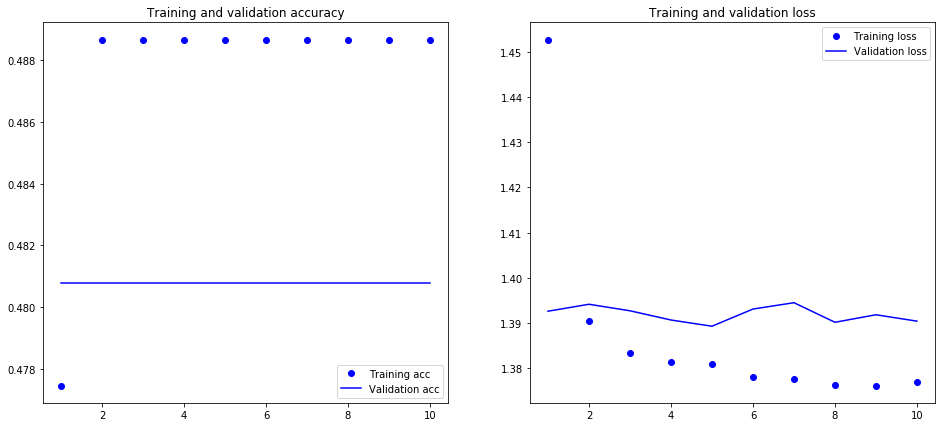

In [46]:
plot_history(h1)


# Model nro.3 

In [92]:

max_features = 1000 # Cut texts after this number of words. Thougs in this case, it is not needed...
maxlen = 100
batch_size = 64
e = 5

print('Loading data...')

print(len(x_train), "train sequences")
print(len(x_test), "test sequences")

print("Pad sequences (samples x time)")
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

#x_train = np.array(x_train)
#x_test = np.array(x_test)

model2 = Sequential()
model2.add(Embedding(max_features, batch_size, input_length=maxlen))
model2.add(LSTM(64))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation="sigmoid"))

model2.add(Dense(64, activation = "relu"))
model2.add(Dropout(0.25))
model2.add(Dense(7, activation = "relu"))
model2.summary()
# try using different optimizers and different optimizer configs
model2.compile("adam", "binary_crossentropy", metrics=["acc"])
print(" ")
print("Train...")
#model2.fit(x_train,
#          batch_size=batch_size,
#          epochs = e
  #        )
#          #validation_data=[x_test, one_hot_labels])


Loading data...
10000 train sequences
10000 test sequences
Pad sequences (samples x time)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, 100, 64)           64000     
_________________________________________________________________
lstm_34 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dropout_54 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_69 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_55 (Dropout)         (None, 64)                0         
____________________________________________________

# Training of CNN model2

Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 8s 1ms/step - loss: 0.7694 - acc: 0.8313 - val_loss: 0.3248 - val_acc: 0.8571
Epoch 2/10
7500/7500 [==============================] - 6s 820us/step - loss: 0.3824 - acc: 0.8542 - val_loss: 0.3207 - val_acc: 0.8571
Epoch 3/10
7500/7500 [==============================] - 6s 817us/step - loss: 0.3426 - acc: 0.8567 - val_loss: 0.3178 - val_acc: 0.8571
Epoch 4/10
7500/7500 [==============================] - 6s 828us/step - loss: 0.3255 - acc: 0.8565 - val_loss: 0.3164 - val_acc: 0.8571
Epoch 5/10
7500/7500 [==============================] - 6s 842us/step - loss: 0.3210 - acc: 0.8573 - val_loss: 0.3175 - val_acc: 0.8571
Epoch 6/10
7500/7500 [==============================] - 7s 892us/step - loss: 0.3168 - acc: 0.8574 - val_loss: 0.3155 - val_acc: 0.8571
Epoch 7/10
7500/7500 [==============================] - 6s 856us/step - loss: 0.3138 - acc: 0.8550 - val_loss: 0.3156 - val_acc: 0.8571
Ep

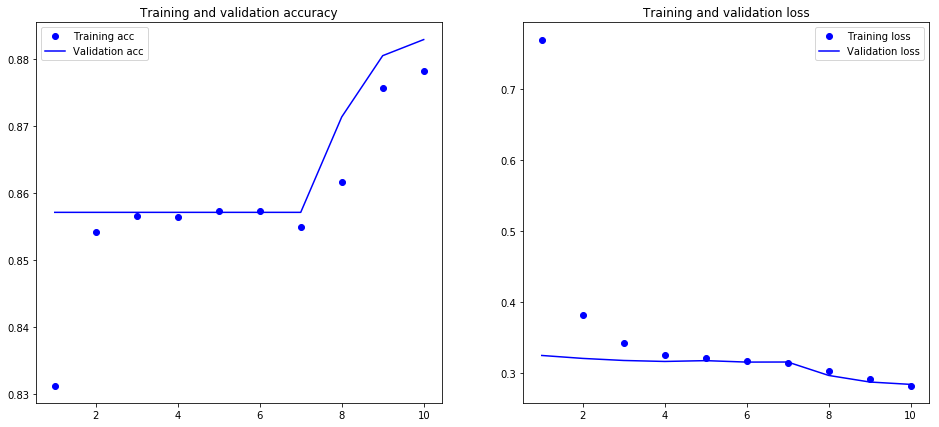

In [93]:
# Train the first model and plot the history
h1 = train_model(model2, x_train, one_hot_labels)
plot_history(h1)

In [49]:
from sklearn.metrics import confusion_matrix
a = confusion_matrix(x_train, x_test)
a

NameError: name 'x_test' is not defined

In [47]:
h1